In [1]:
pip install layoutparser torchvision && pip install "detectron2@git+https://github.com/facebookresearch/detectron2.git@v0.5#egg=detectron2"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.2/19.2 MB 57.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 75.6 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.6/143.6 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 71.1 MB/s eta 0:00:00:00:01
  Created wheel for iopath: filename=iopath-0.1.10-py3-none-any.whl size=31532 sha256=f9ec96fb554c152d8d6a5b985dbcd5e52a74d516a686e77bbfc4294c0788f793
  Stored in directory: /home/codespace/.cache/pip/wheels/9a/a3/b6/ac0fcd1b4ed5cfeb3db92e6a0e476cfd48ed0df92b91080c1d
Successfully built iopath
  Cloning https://github.com/facebookresearch/detectron2.git (to revision v0.5) to /tmp/pip-install-1hbnhghy/detectron2_d2383e3b166544caa762bb9eb545d1b9
  Running 

In [2]:
import layoutparser as lp

import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np
import cv2

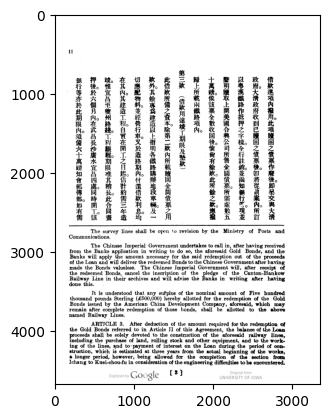

In [4]:
image = cv2.imread('/workspaces/eastd143b-ocr/data/images/2r_2l_01.jpg')
plt.imshow(image)

In [ ]:
model = lp.Detectron2LayoutModel('lp://TableBank/faster_rcnn_R_50_FPN_3x/config', label_map = {0: 'Table', 1: 'Figure'})

In [ ]:
model.detect(image)

In [ ]:
ocr_agent = lp.TesseractAgent(languages='eng+chi_tra')

In [ ]:
res = text = ocr_agent.detect(image, return_response=True)

In [ ]:
print(res)

In [ ]:
layout = ocr_agent.gather_data(res, agg_level=lp.TesseractFeatureType.WORD)

In [ ]:
lp.draw_text(image, layout, show_bbox=True)

In [ ]:
#find models here https://layout-parser.readthedocs.io/en/latest/